
# Import & Data Loading

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from math import sqrt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
heart_data = pd.read_csv('/content/drive/MyDrive/IA_DMBI/heart_disease_data.csv')

In [ ]:
heart_data.head()

,Name,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,Theodore Humphrey,63.0,1,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,Zachary Hudson,37.0,1,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,Kathleen Hernandez,41.0,0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,Edward Weaver,NaN,1,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,Jason Luna,57.0,0,0,120,354,0,1,163.0,1,0.6,2,0,2,1


In [ ]:
heart_data.shape

(303, 15)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      303 non-null    object 
 1   age       296 non-null    float64
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   301 non-null    float64
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
 12  ca        303 non-null    int64  
 13  thal      303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 35.6+ KB


# Data Cleaning

In [ ]:
# checking for missing values
heart_data.isnull().sum()

Name        0
age         7
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     2
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_data = heart_data.dropna()


In [ ]:
heart_data.isnull().sum()

Name        0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 Handling Missing Values

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      294 non-null    object 
 1   age       294 non-null    float64
 2   sex       294 non-null    int64  
 3   cp        294 non-null    int64  
 4   trestbps  294 non-null    int64  
 5   chol      294 non-null    int64  
 6   fbs       294 non-null    int64  
 7   restecg   294 non-null    int64  
 8   thalach   294 non-null    float64
 9   exang     294 non-null    int64  
 10  oldpeak   294 non-null    float64
 11  slope     294 non-null    int64  
 12  ca        294 non-null    int64  
 13  thal      294 non-null    int64  
 14  target    294 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 36.8+ KB


In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,54.350340,0.680272,0.959184,131.482993,246.880952,0.142857,0.520408,149.493197,0.329932,1.054082,1.394558,0.734694,2.312925,0.534014
std,9.063092,0.467166,1.040986,17.496115,51.987555,0.350524,0.527010,22.923488,0.470990,1.170004,0.613365,1.020784,0.616084,0.499692
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.250000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,242.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Selection & Reduction

In [ ]:
heart_data.drop(['Name'], axis='columns', inplace= True)
# heart_data.head(15)

In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    157
0    137
Name: target, dtype: int64

No Class Imbalance

1 --> Defective Heart

0 --> Healthy Heart

# Data Mining

**Splitting the Features and Target**

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X.shape)
X

(294, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1,3,145,233,1,0,150.0,0,2.3,0,0,1
1,37.0,1,2,130,250,0,1,187.0,0,3.5,0,0,2
2,41.0,0,1,130,204,0,0,172.0,0,1.4,2,0,2
4,57.0,0,0,120,354,0,1,163.0,1,0.6,2,0,2
5,57.0,1,0,140,192,0,1,148.0,0,0.4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123.0,1,0.2,1,0,3
299,45.0,1,3,110,264,0,1,132.0,0,1.2,1,0,3
300,68.0,1,0,144,193,1,1,141.0,0,3.4,1,2,3
301,57.0,1,0,130,131,0,1,115.0,1,1.2,1,1,3


In [ ]:
print(Y.shape)
Y

(294,)


0      1
1      1
2      1
4      1
5      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 294, dtype: int64

Splitting the Data into Training data & Test Data

In [ ]:
X.shape

(294, 13)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, y_train.shape, y_test.shape)

(294, 13) (235, 13) (59, 13)
(294,) (235,) (59,)


**Model Creation**

Using Navie Bayes

In [ ]:
# Define Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict the classes of the test data
y_pred_nb = nb_model.predict(X_test)
y_pred_nb

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
# Define decision tree model
dt_model = DecisionTreeClassifier()

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict the classes of the test data
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])



# Pattern Evaluation

In [ ]:
# Define decision tree model
dt_model = DecisionTreeClassifier()

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict the classes of the test data
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

Evaluation For Decision Tree

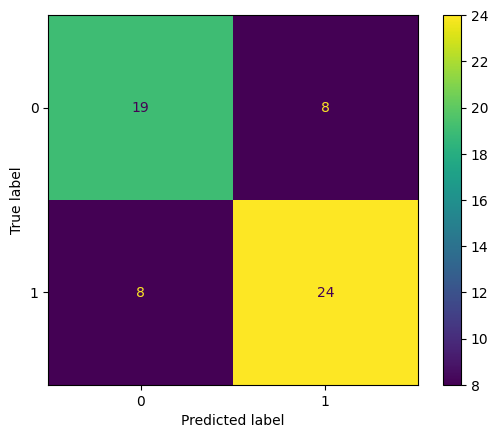

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

Accuracy: 76.27118644067797 %
Precision: 78.125 %
Recall: 78.125 %
F1-Score: 78.125 %


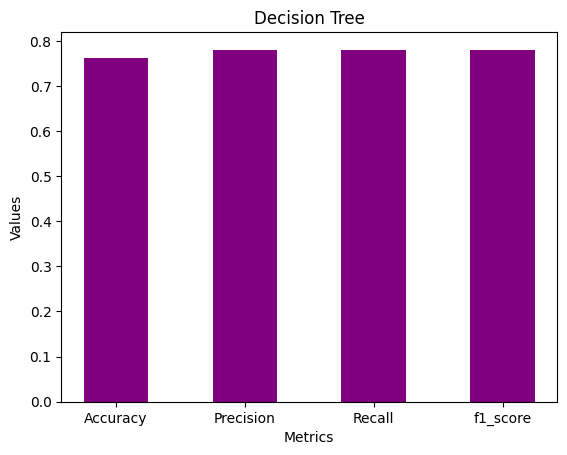

In [ ]:
# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

td=100*accuracy
print("Accuracy:", 100*accuracy,"%")
print("Precision:", 100*precision_score(y_test, y_pred_dt),"%")
print("Recall:", 100*recall_score(y_test, y_pred_dt),"%")
print("F1-Score:", 100*f1_score(y_test, y_pred_dt),"%")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

metrics = ['Accuracy', 'Precision', 'Recall', 'f1_score']
values = [ accuracy,precision,recall,f1]
fig, ax = plt.subplots()
ax.bar(metrics, values, width=0.5,color="purple")
ax.set_title('Decision Tree')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
plt.show()

Evaluation For Naive Bayes

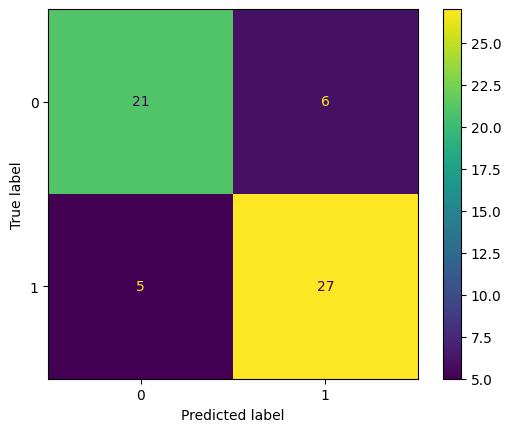

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

Accuracy: 81.35593220338984 %
Precision: 81.81818181818183 %
Recall: 84.375 %
F1-Score: 83.07692307692308 %


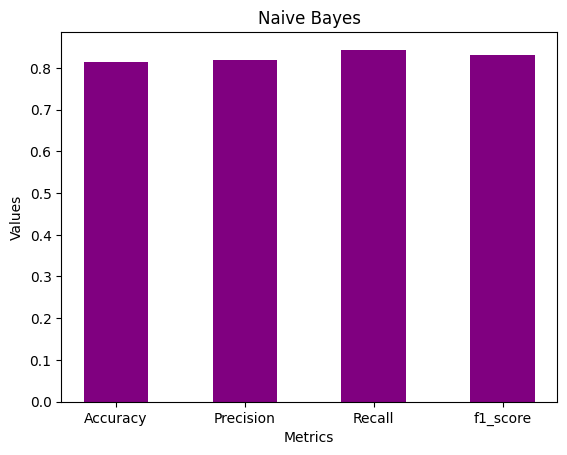

In [ ]:
# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

print("Accuracy:", 100*accuracy_score(y_test, y_pred_nb),"%")
print("Precision:", 100*precision_score(y_test, y_pred_nb),"%")
print("Recall:", 100*recall_score(y_test, y_pred_nb),"%")
print("F1-Score:", 100*f1_score(y_test, y_pred_nb),"%")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

metrics = ['Accuracy', 'Precision', 'Recall', 'f1_score']
values = [ accuracy,precision,recall,f1]
fig, ax = plt.subplots()
ax.bar(metrics, values, width=0.5,color="purple")
ax.set_title('Naive Bayes')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
plt.show()

**Changing Hyperparameters**

Best alpha: 1e-09
Accuracy: 84.26966292134831 %
Precision: 85.71428571428571 %
Recall: 88.88888888888889 %
F1-Score: 87.27272727272727 %


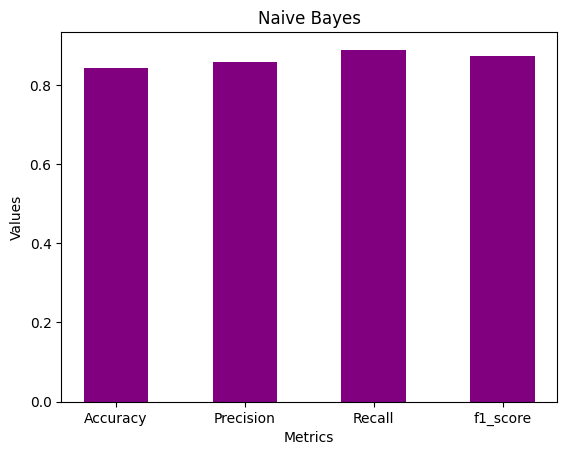

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define the range of values for alpha to be tuned
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

# Create the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform GridSearchCV to find the optimal value of alpha
grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best value of alpha found by GridSearchCV
print('Best alpha:', grid_search.best_params_['var_smoothing'])

# Train the model using the best value of alpha
clf = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
clf.fit(X_train, y_train)

# Predict the target variable using the trained model
y_pred = clf.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


tn=100*accuracy_score(y_test, y_pred)
# Evaluate the performance of the model
print("Accuracy:", 100*accuracy_score(y_test, y_pred),"%")
print("Precision:", 100*precision_score(y_test, y_pred),"%")
print("Recall:", 100*recall_score(y_test, y_pred),"%")
print("F1-Score:", 100*f1_score(y_test, y_pred),"%")

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

metrics = ['Accuracy', 'Precision', 'Recall', 'f1_score']
values = [ accuracy,precision,recall,f1]
fig, ax = plt.subplots()
ax.bar(metrics, values, width=0.5,color="purple")
ax.set_title('Naive Bayes')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
plt.show()


# Knowledge Representation

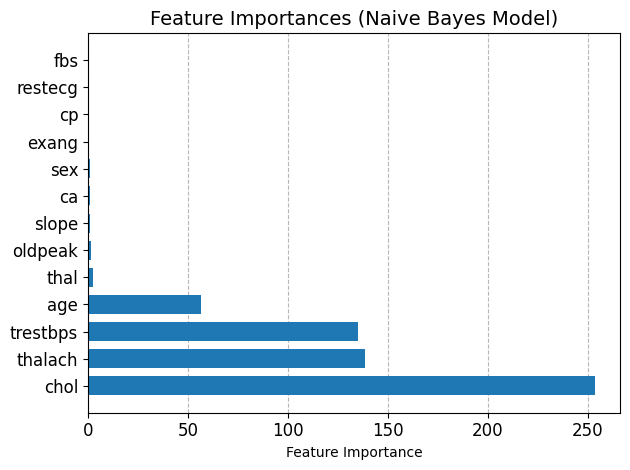

In [ ]:
# Get feature importances
importances = clf.theta_[0]

# Create a horizontal bar plot for feature importances
features = heart_data.columns[:-1]
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], height=0.7, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the plot in descending order
plt.gca().set_axisbelow(True)  # Display the grid below the plot
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Feature Importances (Naive Bayes Model)', fontsize=14)
plt.tight_layout()
plt.savefig('naive_bayes.png', dpi=300, bbox_inches='tight', pad_inches=0.1, format='png')
plt.show()


# Predictions

Prediction of Navie Bayes

In [ ]:
input_data = (62,0,0,140,251,0,0,160,0,3.6,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = nb_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


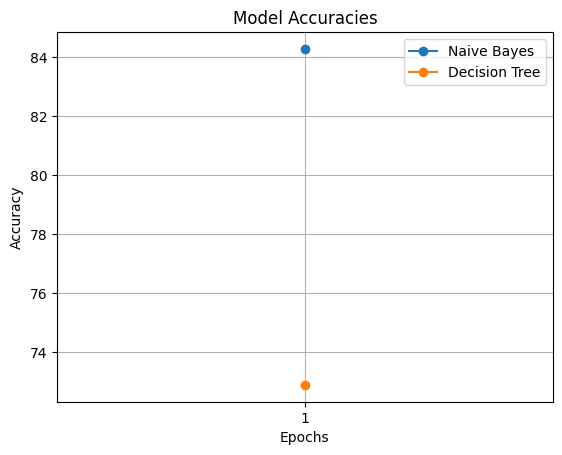

In [ ]:
import matplotlib.pyplot as plt

# Epochs (for visualization purposes, you can set it to [1] since there's only one accuracy value per model)
epochs = [1]

# Accuracy values for Naive Bayes and Decision Tree
accuracy_nb = tn  # Replace with your Naive Bayes accuracy
accuracy_decision_tree = td  # Replace with your Decision Tree accuracy

accuracies_nb = [accuracy_nb] * len(epochs)
accuracies_decision_tree = [accuracy_decision_tree] * len(epochs)

plt.plot(epochs, accuracies_nb, marker='o', label='Naive Bayes')
plt.plot(epochs, accuracies_decision_tree, marker='o', label='Decision Tree')
plt.title('Model Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs, [str(epoch) for epoch in epochs])
plt.legend()
plt.grid(True)
plt.show()


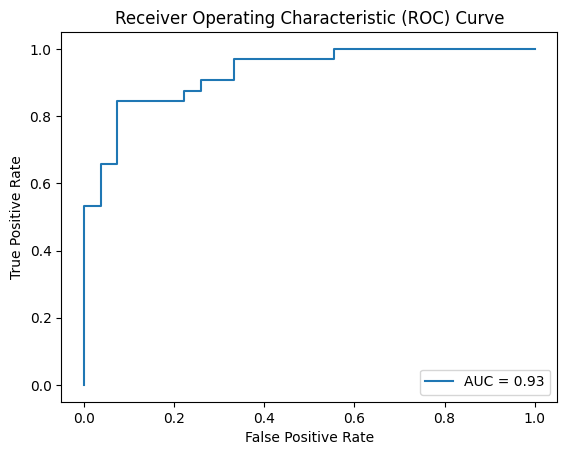

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
y_prob = nb_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


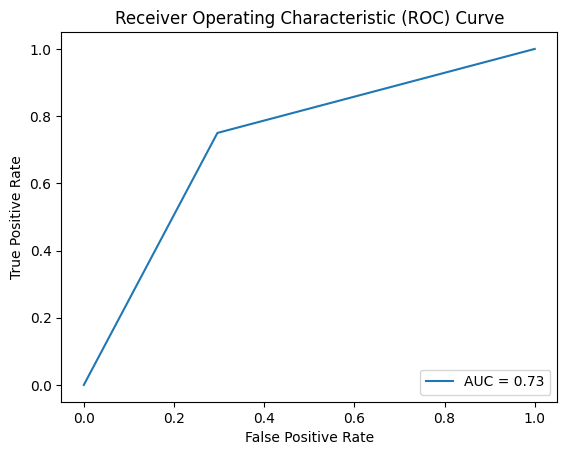

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
y_prob = dt_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Conclusion


In this dataset using various attributes, predicting the person having heart disease or not.For the i used two model naive bayes and decision tree and its accuracy is 87 and 71 respectively.Make the plots of confusion matrix, box plot on accuracy precision f1 score, line plot for both model accuracy and ROC curve.
And tested by giving some inputs to get prediction.

In [ ]:
# Code for generating the plots (as you've provided)

# Store the plot data in a dictionary
plot_data = {
    'confusion_matrix': cm.tolist(),
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'feature_importances': {
        'features': features[indices].tolist(),
        'importances': importances[indices].tolist()
    },
    'roc_curve': {
        'fpr': fpr.tolist(),
        'tpr': tpr.tolist(),
        'roc_auc': roc_auc
    }
}


In [ ]:
import json
# Convert the plot data dictionary to JSON format
json_data = json.dumps(plot_data, indent=4)

# Save the JSON data to a file
with open('plot_data.json', 'w') as json_file:
    json_file.write(json_data)
